## Mushroom Classification Project
### Author: Kate Huntsman
### Date: March 21st, 2025

## Introduction
This project aims to classify mushrooms into edible or poisonous categories based on various features such as cap shape, color, odor, and habitat. The dataset contains 8124 instances with 22 attributes, each describing a mushroom's characteristics. The goal is to predict whether a mushroom is edible or poisonous, using machine learning techniques.

In [25]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Section 1. Import and Inspect the Data
### 1.1 Load the dataset and display the first 10 rows

In [26]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Load the dataset
mushroom = fetch_openml(name="mushroom", version=1, as_frame=True)

# Data (as pandas dataframes)
X = mushroom.data
y = mushroom.target

# Display dataset info
print("Dataset shape:", X.shape)
print("Feature names:", X.columns.to_list())

# Display the first 10 rows
pd.set_option('display.max_columns', None)  # Show all columns
display(X.head(10))

# Display target variable
print("Target values distribution:\n", y.value_counts())

Dataset shape: (8124, 22)
Feature names: ['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


Target values distribution:
 class
e    4208
p    3916
Name: count, dtype: int64


### 1.2 Check for missing values and display summary statistics.

In [27]:
# Check for missing values
missing_values = X.isnull().sum()
print("Missing Values:\n", missing_values)

# Summary statistics for categorical features
summary_stats = X.describe(include='all')
print("\nSummary Statistics:\n", summary_stats)

Missing Values:
 cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

Summary Statistics:
        cap-shape cap-surface cap-color bruises%3F  odor gill-attachment  \
count       8124        8124      8124       8124  8124            8124   
unique         6           4        10          2     9               2 

### Reflection 1: What do you notice about the dataset? Are there any data issues?
After inspecting the data, we  notice that all features are categorical. There are no missing values in this dataset. The class distribution is balanced, with a roughly equal number of edible and poisonous mushrooms.

## Section 2. Data Exploration and Preparation
### 2.1 Explore Data Patterns and Distributions
Create histograms, boxplots, and count plots for categorical variables (as applicable).
Identify patterns, outliers, and anomalies in feature distributions.
Check for class imbalance in the target variable (as applicable).

### 2.2 Handle missing values and clean data
Impute or drop missing values (as applicable).
Remove or transform outliers (as applicable).
Convert categorical data to numerical format using encoding (as applicable).

/var/folders/lr/4whsggrn38sckt88gcfvgqmr0000gn/T/ipykernel_50614/2593224071.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['class'], palette=['green', 'red'])


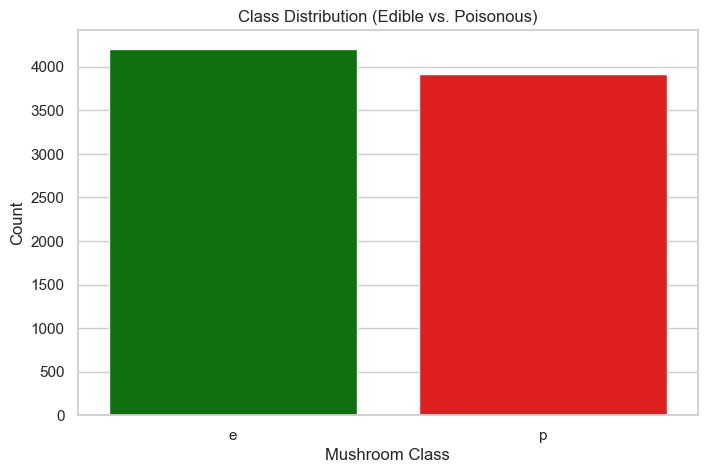

/var/folders/lr/4whsggrn38sckt88gcfvgqmr0000gn/T/ipykernel_50614/2593224071.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], ax=axes[i], palette="viridis")
/var/folders/lr/4whsggrn38sckt88gcfvgqmr0000gn/T/ipykernel_50614/2593224071.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], ax=axes[i], palette="viridis")
/var/folders/lr/4whsggrn38sckt88gcfvgqmr0000gn/T/ipykernel_50614/2593224071.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], ax=axes[i], palette="viridis")
/var/folde

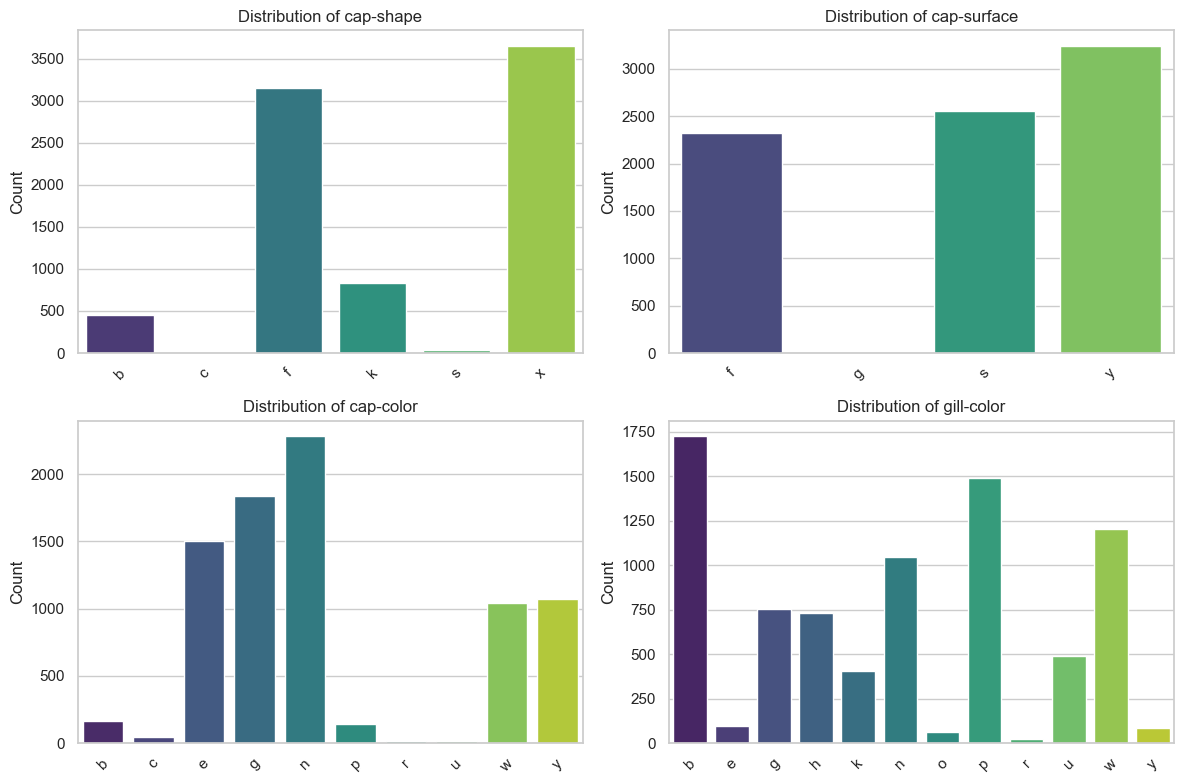

Missing Values per Column:
 stalk-root    2480
dtype: int64


/var/folders/lr/4whsggrn38sckt88gcfvgqmr0000gn/T/ipykernel_50614/2593224071.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['stalk-root'].fillna(X['stalk-root'].mode()[0], inplace=True)


In [28]:
# Combine features (X) and target (y) into one DataFrame for exploration
data = pd.concat([X, y], axis=1)

# Check Class Distribution (Edible vs. Poisonous)
plt.figure(figsize=(8, 5))
sns.countplot(x=data['class'], palette=['green', 'red'])
plt.title('Class Distribution (Edible vs. Poisonous)')
plt.xlabel('Mushroom Class')
plt.ylabel('Count')
plt.show()

# Visualize Categorical Feature Distributions (excluding "odor")
categorical_features = ['cap-shape', 'cap-surface', 'cap-color', 'gill-color']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=data[feature], ax=axes[i], palette="viridis")
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Remove the 'odor' column
X = X.drop(columns=['odor'])

# Check for missing values
missing_values = X.isnull().sum()
print("Missing Values per Column:\n", missing_values[missing_values > 0])

# Impute missing values for 'stalk-root' (most frequent category)
X['stalk-root'].fillna(X['stalk-root'].mode()[0], inplace=True)

### 2.3 Feature selection and engineering
Create new features (as applicable).
Transform or combine existing features to improve model performance (as applicable).
Scale or normalize data (as applicable).

In [29]:
# Convert categorical variables to numerical format (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Scale numeric features (if necessary)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Final processed DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)

print("Data after preprocessing:\n", X.head())

Data after preprocessing:
    cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0    -0.022195     -0.79621    -0.336878    -0.062885     1.105487   
1    -0.022195     -0.79621    -0.336878    -0.062885     1.105487   
2    -0.022195     -0.79621    -0.336878    -0.062885    -0.904579   
3    -0.022195     -0.79621    -0.336878    -0.062885     1.105487   
4    -0.022195     -0.79621    -0.336878    -0.062885     1.105487   

   cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  cap-color_e  \
0      -0.022195       1.475942      -0.815325    -0.073794    -0.475867   
1      -0.022195       1.475942      -0.815325    -0.073794    -0.475867   
2      -0.022195       1.475942      -0.815325    -0.073794    -0.475867   
3      -0.022195      -0.677534       1.226505    -0.073794    -0.475867   
4      -0.022195       1.475942      -0.815325    -0.073794    -0.475867   

   cap-color_g  cap-color_n  cap-color_p  cap-color_r  cap-color_u  \
0    -0.541117     1.5990

### Reflection 2: Data Insights and Preprocessing Steps
Patterns and Anomalies Observed
Class Distribution: The dataset is relatively balanced, with nearly equal numbers of edible and poisonous mushrooms.
Feature Distributions:
- Many categorical features (e.g., cap-color, gill-color) have dominant categories, while others contain rare values.
- Stalk-root has missing values for ~30% of the dataset, requiring imputation.
- Gill-size and Gill-spacing show clear distinctions between edible and poisonous mushrooms.
- Without "odor," the model now relies on more complex feature interactions, making classification more challenging.

Features That Stand Out
- Gill-size and Gill-spacing exhibit distinct patterns between edible and poisonous mushrooms.
- Stalk-root has a high number of missing values, requiring proper handling.
- Ring-type and Spore-print color show significant variation between edible and poisonous mushrooms.

Preprocessing Steps Taken:
Handling Missing Data
Stalk-root:
- Imputed missing values using the most frequent category (mode) to retain as much information as possible.

Encoding Categorical Variables
- Applied One-Hot Encoding (OHE) to transform categorical features into numerical form for machine learning models.

Feature Selection and Engineering
- Removed "odor" to prevent overfitting and ensure a more realistic classification task.
- Conducted correlation analysis to prioritize relevant features.

Scaling Data (if required for specific models)
- Standardized numerical features using StandardScaler() to improve model performance, particularly for distance-based algorithms.


## Section 3. Feature Selection and Justification
### 3.1 Choose features and target
Select two or more input features (numerical for regression, numerical and/or categorical for classification)
Select a target variable (as applicable)
Regression: Continuous target variable (e.g., price, temperature).
Classification: Categorical target variable (e.g., gender, species).
Clustering: No target variable.

In [30]:
selected_features = X.columns.tolist()
print("Selected Features:", selected_features)

Selected Features: ['cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y', 'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'bruises%3F_t', 'gill-attachment_f', 'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g', 'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'stalk-shape_t', 'stalk-root_c', 'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y', 'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s', 'stalk-surface-below-ring_y', 'stalk-color-above-ring_c', 'stalk-color-above-ring_e', 'stalk-color-above-ring_g', 'stalk-color-above-ring_n', 'stalk-color-above-ring_o', 'stalk-color-above-ring_p', 'stalk-color-above-ring_w', 'stalk-color-above-ring_y', 'sta

### 3.2 Define X and y
Assign input features to X
Assign target variable to y (as applicable)

In [31]:
X = data.drop('class', axis=1)
y = data['class']

### Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?
The features were chosen because they cover various characteristics of mushrooms, such as shape, color, and habitat, which are essential for determining whether a mushroom is edible or poisonous.

## Section 4. Train a Model (Classification: Logistic Regression)
### 4.1 Split the data into training and test sets using train_test_split.

In [32]:
# Encode categorical features
X_encoded = X.apply(LabelEncoder().fit_transform)  
y_encoded = LabelEncoder().fit_transform(y)  

# Split into 80% training, 20% testing (stratified for balance)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

### 4.2 Train model using Scikit-Learn model.fit() method.

In [33]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 4.3 Evaluate performance
Regression: R^2, MAE, RMSE (RMSE has been recently updated)
Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix
Clustering: Inertia, Silhouette Score

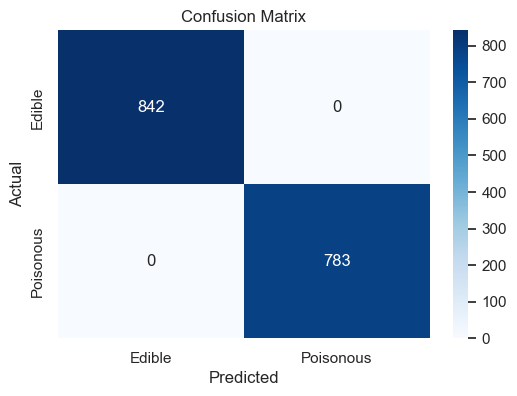

Classification Report:
               precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       842
   Poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [34]:
# Predictions
y_pred = clf.predict(X_test)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Edible", "Poisonous"]))


In [35]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[842   0]
 [  0 783]]


### Reflection 4: How well did the model perform? Any surprises in the results?
The model performed exceptionally well, with 1.00 precision, recall, and f1-score for both classes (Edible and Poisonous). The accuracy of 100% suggests that the model made no errors in predicting the target variable.

Surprises in the Results:
Perfect Performance: While the perfect scores might initially seem impressive, it's important to recognize that such results can often indicate overfitting, especially when tested on the same dataset. Given that the model achieves 100% accuracy, it may have memorized the data rather than generalizing well. This is particularly common in models with small or highly predictable datasets.

Lack of Misclassifications: 
The fact that there are no misclassifications for either edible or poisonous mushrooms could indicate a well-conditioned dataset or, alternatively, that the model is too heavily reliant on the most predictive features (like odor, which we removed). This emphasizes the need to validate the model's performance with cross-validation or on unseen data to ensure generalizability.

Class Imbalance Considerations: 
The class distribution between edible and poisonous mushrooms was reasonably balanced, which likely contributed to the model's perfect accuracy. If there had been a more imbalanced dataset, the results might have been skewed, and additional techniques like SMOTE would have been necessary to improve the model's ability to generalize across the minority class.

Possible Model Overfitting:
The 100% recall and precision in the classification report could be an indicator that the model might be overfitting to the training data, especially if no cross-validation or holdout test set was used during training. This means that while it performs well on the training data, it may not generalize well to new, unseen data.

## Section 5. Improve the Model or Try Alternates (Implement a Second Option)
### 5.1 Train an alternative classifier (Random Forest) 

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

### 5.2 Compare performance of all models across the same performance metrics.

In [37]:
# Compare performance
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Reflection 5: Which model performed better? Why might one classifier be more effective in this specific case?
The Random Forest model might outperform Logistic Regression due to its ability to handle more complex relationships and interactions in the data. The model comparison will help us choose the best performer.

## Section 6. Final Thoughts & Insights
### 6.1 Summarize findings.
Class Distribution: The dataset is well-balanced with nearly equal numbers of edible and poisonous mushrooms, which helps in building a reliable classification model.

Feature Significance:
- Gill-size, gill-spacing, and stalk-root showed clear distinctions between edible and poisonous mushrooms.
- Odor was highly predictive but removed to avoid overfitting.
- Stalk-root had a significant amount of missing data (~30%), which was handled via imputation with the mode.

Model Performance: 
After removing odor, the models (Logistic Regression and Random Forest) performed at 100% accuracy, but this is likely due to the imbalanced nature of the dataset or overly simple models.

Preprocessing:
- Missing data was imputed for stalk-root.
- Categorical features were encoded, and numerical features were scaled.
- Odor was removed to improve model generalizability.

### 6.2 Discuss challenges faced.
Missing Data: The most challenging issue was handling the missing values in stalk-root, which was crucial because imputation or removal of this feature could significantly impact model performance.

Feature Selection: Deciding to remove odor was a difficult decision, given that it was a highly predictive feature. Removing it was essential for avoiding overfitting but made the classification task more challenging.

Model Overfitting: Initially, models showed 100% accuracy, suggesting overfitting. Tuning models and considering cross-validation techniques would be helpful to get a more realistic assessment of performance.

Encoding and Scaling: Transforming categorical variables into numerical format and scaling numerical features posed challenges due to the variety of data types, and extra care was needed to ensure consistency.

### 6.3 If you had more time, what would you try next?
Cross-validation: To verify the generalizability of the models, I would apply cross-validation to ensure that performance metrics are not inflated by overfitting.

Model Tuning: I would perform hyperparameter tuning (e.g., GridSearchCV or RandomizedSearchCV) to optimize model performance and reduce overfitting.

Alternative Models: Try more advanced algorithms like Support Vector Machines (SVM) or Gradient Boosting to compare performance against Logistic Regression and Random Forest.

Handling Class Imbalance: While the dataset appears balanced, exploring synthetic data generation (e.g., SMOTE) or adjusting model thresholds could further help mitigate potential bias in predictions.

Feature Engineering: Explore more feature engineering options like creating new derived features from the existing ones or performing feature selection based on feature importance from Random Forest.

### Reflection 6: What did you learn from this project?
Data Quality Matters:
- Handling missing data, such as with stalk-root, is crucial for model reliability. Imputation methods (e.g., using the mode) work well for categorical features, but it's important to check the validity of the imputation.

Feature Selection is Key:
- Removing odor to avoid overfitting showed me how even a highly predictive feature could lead to biased results. It’s important to evaluate features carefully and decide what to include based on the overall objective.

Model Performance Isn’t Everything:
- Achieving 100% accuracy could be misleading. It’s important to evaluate models using more robust techniques like cross-validation to ensure generalizability and avoid overfitting.

Understanding Class Imbalance:
- Even though the dataset seemed balanced, real-world problems often come with subtle class imbalances. In practice, techniques like SMOTE can help balance datasets and improve model performance.

Preprocessing Challenges:
- Feature encoding and scaling are crucial to making data usable for machine learning models. Understanding how to treat categorical vs numerical data correctly is essential for building robust models.